In [1]:
from jcopdl.callback import set_config

In [2]:
data = "jkse"

config = set_config({
    "input_size": 1,
    "seq_len": 14,
    "batch_size": 32,
    "output_size": 1,
    "hidden_size": 256,
    "num_layers": 2,
    "dropout": 0.2,
    "bidirectional": False,
    "cell_type": "lstm"
})

lr = 0.0005

# Jangan edit code di bawah ini

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch
from torch import nn, optim
from jcopdl.callback import Callback
from jcopdl.utils.dataloader import TimeSeriesDataset
from torch.utils.data import DataLoader
from utils import data4pred, pred4pred

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
from jcopdl.layers import rnn_block

class RNN(nn.Module):
    def __init__(self, cell_type, input_size, output_size, hidden_size, num_layers, dropout, bidirectional):
        super().__init__()
        
        self.rnn = rnn_block(input_size, hidden_size, num_layers, cell_type, dropout=dropout, bidirectional=bidirectional)
        
        if bidirectional:
            self.fc = nn.Linear(2*hidden_size, output_size)
        else:
            self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x, hidden):        
        x, hidden = self.rnn(x, hidden)
        x = self.fc(x)
        return x, hidden

(N, S, F): (138, 14, 1)
Note: last 7 data excluded

(N, S, F): (34, 14, 1)
Note: last 9 data excluded


Epoch     1
Train_cost  = 4.1807 | Test_cost  = 3.3342 | 

Epoch     2
Train_cost  = 3.7449 | Test_cost  = 3.1752 | 

Epoch     3
Train_cost  = 3.3893 | Test_cost  = 2.8591 | 

Epoch     4
Train_cost  = 2.8469 | Test_cost  = 2.3127 | 

Epoch     5
Train_cost  = 1.9066 | Test_cost  = 1.5335 | 

Epoch     6
Train_cost  = 1.2395 | Test_cost  = 1.0344 | 

Epoch     7
Train_cost  = 1.0520 | Test_cost  = 0.7888 | 

Epoch     8
Train_cost  = 1.0243 | Test_cost  = 0.7414 | 

Epoch     9
Train_cost  = 0.8935 | Test_cost  = 0.7627 | 
==> EarlyStop patience =  1 | Best test_cost: 0.7414

Epoch    10
Train_cost  = 0.8294 | Test_cost  = 0.7617 | 
==> EarlyStop patience =  2 | Best test_cost: 0.7414

Epoch    11
Train_cost  = 0.7693 | Test_cost  = 0.6958 | 

Epoch    12
Train_cost  = 0.7078 | Test_cost  = 0.6121 | 

Epoch    13
Train_cost  = 0.6652 | Test_cost  = 0.5687 | 

Epoch    14
Train_cost 

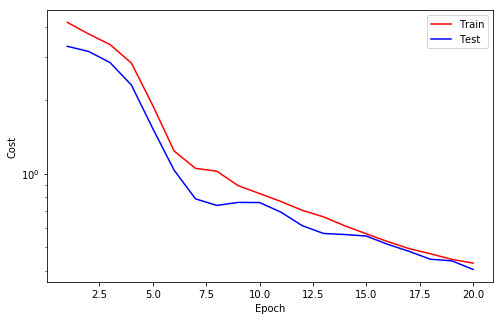


Epoch    21
Train_cost  = 0.4105 | Test_cost  = 0.4008 | 

Epoch    22
Train_cost  = 0.3970 | Test_cost  = 0.3593 | 

Epoch    23
Train_cost  = 0.3810 | Test_cost  = 0.3603 | 
==> EarlyStop patience =  1 | Best test_cost: 0.3593

Epoch    24
Train_cost  = 0.3611 | Test_cost  = 0.3296 | 

Epoch    25
Train_cost  = 0.3463 | Test_cost  = 0.3187 | 

Epoch    26
Train_cost  = 0.3312 | Test_cost  = 0.3088 | 

Epoch    27
Train_cost  = 0.3179 | Test_cost  = 0.2943 | 

Epoch    28
Train_cost  = 0.3072 | Test_cost  = 0.2869 | 

Epoch    29
Train_cost  = 0.2946 | Test_cost  = 0.2748 | 

Epoch    30
Train_cost  = 0.2839 | Test_cost  = 0.2655 | 

Epoch    31
Train_cost  = 0.2746 | Test_cost  = 0.2595 | 

Epoch    32
Train_cost  = 0.2634 | Test_cost  = 0.2525 | 

Epoch    33
Train_cost  = 0.2557 | Test_cost  = 0.2407 | 

Epoch    34
Train_cost  = 0.2456 | Test_cost  = 0.2366 | 

Epoch    35
Train_cost  = 0.2368 | Test_cost  = 0.2257 | 

Epoch    36
Train_cost  = 0.2298 | Test_cost  = 0.2259 | 
==>

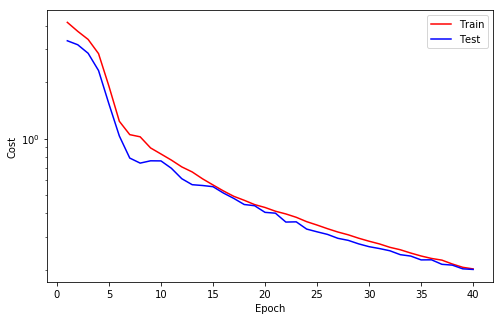


Epoch    41
Train_cost  = 0.1931 | Test_cost  = 0.1904 | 

Epoch    42
Train_cost  = 0.1856 | Test_cost  = 0.1916 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1904

Epoch    43
Train_cost  = 0.1824 | Test_cost  = 0.1785 | 

Epoch    44
Train_cost  = 0.1779 | Test_cost  = 0.1847 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1785

Epoch    45
Train_cost  = 0.1817 | Test_cost  = 0.1679 | 

Epoch    46
Train_cost  = 0.1803 | Test_cost  = 0.1845 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1679

Epoch    47
Train_cost  = 0.1862 | Test_cost  = 0.1595 | 

Epoch    48
Train_cost  = 0.1648 | Test_cost  = 0.1629 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1595

Epoch    49
Train_cost  = 0.1553 | Test_cost  = 0.1524 | 

Epoch    50
Train_cost  = 0.1441 | Test_cost  = 0.1482 | 

Epoch    51
Train_cost  = 0.1404 | Test_cost  = 0.1481 | 

Epoch    52
Train_cost  = 0.1363 | Test_cost  = 0.1406 | 

Epoch    53
Train_cost  = 0.1321 | Test_cost  = 0.1407 | 
==> EarlyStop patienc

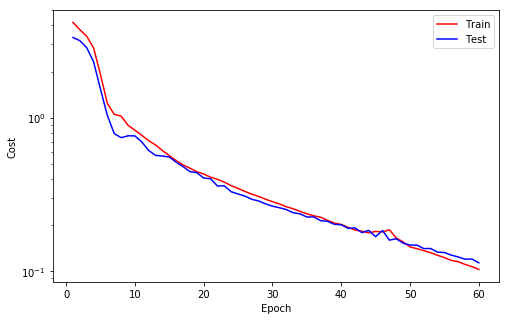


Epoch    61
Train_cost  = 0.1014 | Test_cost  = 0.1117 | 

Epoch    62
Train_cost  = 0.0958 | Test_cost  = 0.1087 | 

Epoch    63
Train_cost  = 0.0953 | Test_cost  = 0.1045 | 

Epoch    64
Train_cost  = 0.0902 | Test_cost  = 0.1051 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1045

Epoch    65
Train_cost  = 0.0858 | Test_cost  = 0.1002 | 

Epoch    66
Train_cost  = 0.0852 | Test_cost  = 0.0956 | 

Epoch    67
Train_cost  = 0.0796 | Test_cost  = 0.0961 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0956

Epoch    68
Train_cost  = 0.0785 | Test_cost  = 0.0906 | 

Epoch    69
Train_cost  = 0.0789 | Test_cost  = 0.0906 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0906

Epoch    70
Train_cost  = 0.0726 | Test_cost  = 0.0856 | 

Epoch    71
Train_cost  = 0.0694 | Test_cost  = 0.0850 | 

Epoch    72
Train_cost  = 0.0670 | Test_cost  = 0.0823 | 

Epoch    73
Train_cost  = 0.0654 | Test_cost  = 0.0806 | 

Epoch    74
Train_cost  = 0.0615 | Test_cost  = 0.0761 | 

Epoch    75
Tr

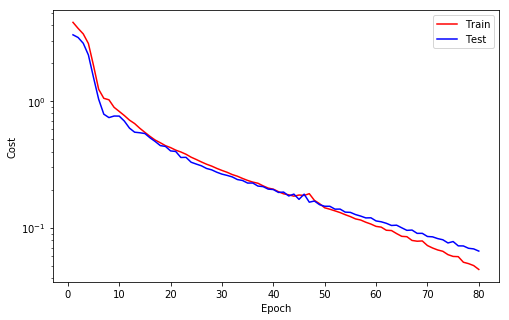


Epoch    81
Train_cost  = 0.0452 | Test_cost  = 0.0646 | 

Epoch    82
Train_cost  = 0.0442 | Test_cost  = 0.0610 | 

Epoch    83
Train_cost  = 0.0439 | Test_cost  = 0.0623 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0610

Epoch    84
Train_cost  = 0.0411 | Test_cost  = 0.0576 | 

Epoch    85
Train_cost  = 0.0389 | Test_cost  = 0.0607 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0576

Epoch    86
Train_cost  = 0.0384 | Test_cost  = 0.0543 | 

Epoch    87
Train_cost  = 0.0354 | Test_cost  = 0.0550 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0543

Epoch    88
Train_cost  = 0.0331 | Test_cost  = 0.0526 | 

Epoch    89
Train_cost  = 0.0335 | Test_cost  = 0.0525 | 

Epoch    90
Train_cost  = 0.0310 | Test_cost  = 0.0509 | 

Epoch    91
Train_cost  = 0.0300 | Test_cost  = 0.0483 | 

Epoch    92
Train_cost  = 0.0287 | Test_cost  = 0.0475 | 

Epoch    93
Train_cost  = 0.0276 | Test_cost  = 0.0458 | 

Epoch    94
Train_cost  = 0.0254 | Test_cost  = 0.0463 | 
==> EarlyStop p

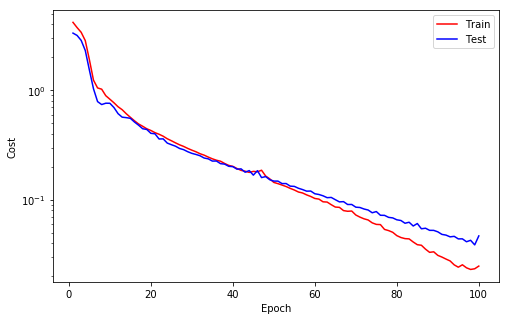

==> EarlyStop patience =  1 | Best test_cost: 0.0387

Epoch   101
Train_cost  = 0.0280 | Test_cost  = 0.0366 | 

Epoch   102
Train_cost  = 0.0282 | Test_cost  = 0.0448 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0366

Epoch   103
Train_cost  = 0.0284 | Test_cost  = 0.0351 | 

Epoch   104
Train_cost  = 0.0255 | Test_cost  = 0.0418 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0351

Epoch   105
Train_cost  = 0.0253 | Test_cost  = 0.0337 | 

Epoch   106
Train_cost  = 0.0241 | Test_cost  = 0.0380 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0337

Epoch   107
Train_cost  = 0.0234 | Test_cost  = 0.0323 | 

Epoch   108
Train_cost  = 0.0222 | Test_cost  = 0.0373 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0323

Epoch   109
Train_cost  = 0.0229 | Test_cost  = 0.0315 | 

Epoch   110
Train_cost  = 0.0204 | Test_cost  = 0.0352 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0315

Epoch   111
Train_cost  = 0.0192 | Test_cost  = 0.0330 | 
==> EarlyStop patience =  2 | Bes

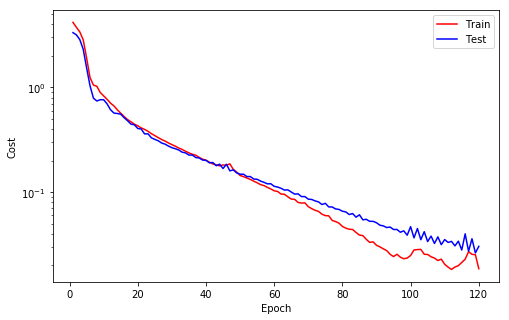

==> EarlyStop patience =  1 | Best test_cost: 0.0262

Epoch   121
Train_cost  = 0.0181 | Test_cost  = 0.0282 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0262

Epoch   122
Train_cost  = 0.0162 | Test_cost  = 0.0257 | 

Epoch   123
Train_cost  = 0.0182 | Test_cost  = 0.0319 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0257

Epoch   124
Train_cost  = 0.0186 | Test_cost  = 0.0259 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0257

Epoch   125
Train_cost  = 0.0180 | Test_cost  = 0.0292 | 
==> EarlyStop patience =  3 | Best test_cost: 0.0257

Epoch   126
Train_cost  = 0.0155 | Test_cost  = 0.0275 | 
==> EarlyStop patience =  4 | Best test_cost: 0.0257

Epoch   127
Train_cost  = 0.0156 | Test_cost  = 0.0265 | 
==> EarlyStop patience =  5 | Best test_cost: 0.0257
==> Execute Early Stopping at epoch: 127 | Best test_cost: 0.0257
==> Best model is saved at model/jkse/


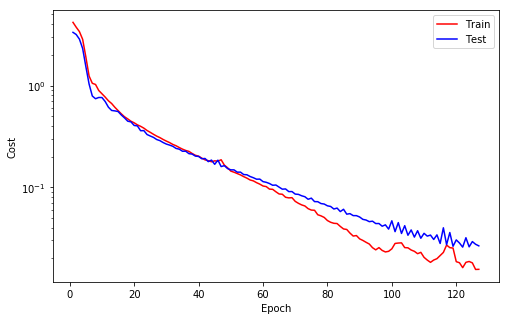

(N, S, F): (1939, 1, 1)
Note: last 0 data excluded

(N, S, F): (485, 1, 1)
Note: last 0 data excluded



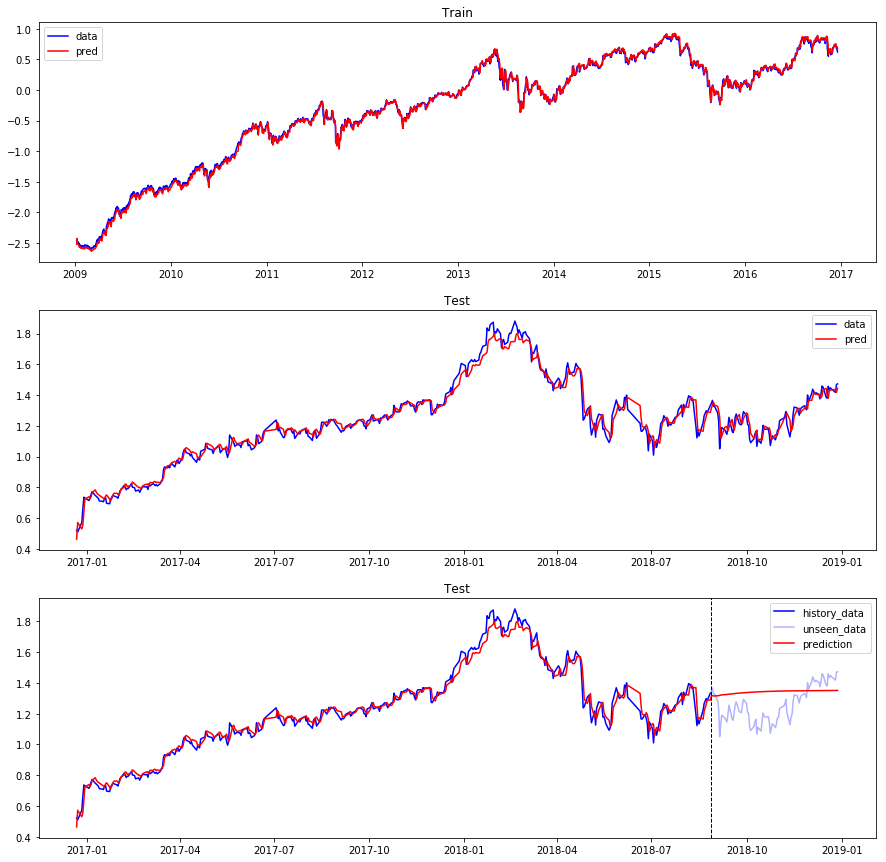

In [5]:
if data == "damped_sine":
    df = pd.read_csv("data/sine.csv", parse_dates=["Date"], index_col="Date")
    df.value = df.value.transform(lambda x: (x-x.mean())/x.std())
    col = "value"    
elif data == "jkse":
    df = pd.read_csv("data/jkse.csv", parse_dates=["Date"], index_col="Date")
    df = df[~df.price.isna()]
    df.price = df.price.transform(lambda x: (x-x.mean())/x.std())
    col = "price"

ts_train, ts_test = train_test_split(df, test_size=0.2, shuffle=False)

train_set = TimeSeriesDataset(ts_train, col, config.seq_len)
trainloader = DataLoader(train_set, batch_size=config.batch_size)

test_set = TimeSeriesDataset(ts_test, col, config.seq_len)
testloader = DataLoader(test_set, batch_size=config.batch_size)

model = RNN(config.cell_type, config.input_size, config.output_size, config.hidden_size, 
            config.num_layers, config.dropout, config.bidirectional).to(device)
criterion = nn.MSELoss(reduction='mean')
optimizer = optim.AdamW(model.parameters(), lr=lr)
callback = Callback(model, config, outdir=f'model/{data}/')

while True:    
    ## Training ##
    hidden = None
    model.train()
    cost = 0
    for inputs, targets in trainloader:
        inputs, targets = inputs.to(device), targets.to(device)
    
        output, hidden = model(inputs, None)
        loss = criterion(output, targets)
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()    
        
        if config.cell_type == "lstm":
            hidden[0].detach_()
            hidden[1].detach_()
        else:
            hidden.detach_()
        
        cost += loss.item()
    train_cost = cost
    
    ## Testing ##
    with torch.no_grad():
        model.eval()
        cost = 0
        for inputs, targets in testloader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            output, hidden = model(inputs, None)
            loss = criterion(output, targets)
        
            cost += loss.item()
        test_cost = cost

    ## Callback ##
    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()    
        weights = torch.load(f"model/{data}/weights_best.pth", map_location="cpu")
        model.load_state_dict(weights)
        break
        
# Forecast
train_forecast_set = TimeSeriesDataset(ts_train, col, 1)
trainforecastloader = DataLoader(train_forecast_set)

test_forecast_set = TimeSeriesDataset(ts_test, col, 1)
testforecastloader = DataLoader(test_forecast_set)

plt.figure(figsize=(15, 15))
    
plt.subplot(311)
data4pred(model, train_forecast_set, trainforecastloader, device)
plt.title("Train")

plt.subplot(312)
data4pred(model, test_forecast_set, testforecastloader, device)
plt.title("Test")

plt.subplot(313)
pred4pred(model, test_forecast_set, testforecastloader, device, n_prior=400, n_forecast=100)
plt.title("Test");